Simply generate some terms (100? 200?) and after it run env on e-greedy step-based policy for checking it.

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append("../")
from calculus.term import *
from calculus.strategy import *
from calculus.generation import *
from calculus.generation_threading import *

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
terms_100, stepsLO_100 = gen_filtered_lambda_terms_v2(count_terms=100)
stepsRI_100 = [term.normalize(RightmostInnermostStrategy())[1] for term in terms_100]

print(f"Generated LO normalizable terms: {len(terms_100)}")
print(f"LO steps: {stepsLO_100}")
print(f"RI steps: {stepsRI_100}")
print(f"LO max: {max(stepsLO_100)}")
print(f"RI max: {max(stepsRI_100)}")

Generated LO normalizable terms: 100
LO steps: [4, 32, 34, 5, 22, 7, 8, 5, 17, 10, 3, 8, 3, 18, 9, 32, 1, 45, 12, 4, 5, 11, 5, 19, 7, 28, 1, 4, 16, 3, 9, 2, 2, 7, 1, 1, 4, 14, 4, 4, 3, 9, 5, 20, 1, 5, 5, 7, 4, 30, 17, 5, 4, 4, 25, 11, 1, 1, 37, 9, 10, 5, 3, 3, 2, 11, 4, 15, 5, 4, 10, 10, 2, 3, 1, 2, 11, 22, 11, 2, 8, 9, 2, 6, 13, 6, 16, 16, 1, 3, 13, 6, 111, 5, 4, 6, 9, 7, 18, 18]
RI steps: [4, 21, 21, 5, 17, 12, 10, 7, 17, 17, 16, 6, 3, 13, 7, 23, 5, 16, 20, 5, 12, 11, 6, 14, 8, 16, 5, 5, 13, 8, 12, 7, 16, 7, 6, 8, 4, 12, 4, 4, 4, 12, 6, 20, 5, 5, 5, 11, 4, 17, 19, 5, 7, 8, 18, 8, 14, 4, 17, 7, 5, 5, 19, 9, 3, 12, 10, 14, 9, 8, 9, 7, 6, 9, 19, 15, 11, 16, 11, 3, 7, 5, 7, 6, 13, 6, 13, 9, 1, 8, 20, 8, 49, 5, 5, 7, 9, 7, 18, 14]
LO max: 111
RI max: 49


In [3]:
terms_200, stepsLO_200 = gen_filtered_lambda_terms_v2(count_terms=200)
stepsRI_200 = [term.normalize(RightmostInnermostStrategy())[1] for term in terms_200]

print(f"Generated LO normalizable terms: {len(terms_200)}")
print(f"LO steps: {stepsLO_200}")
print(f"RI steps: {stepsRI_200}")
print(f"LO max: {max(stepsLO_200)}")
print(f"RI max: {max(stepsRI_200)}")

Generated LO normalizable terms: 200
LO steps: [8, 4, 9, 4, 9, 9, 1, 31, 2, 6, 24, 10, 8, 21, 6, 12, 13, 9, 3, 19, 4, 20, 14, 2, 12, 4, 5, 18, 3, 5, 2, 6, 7, 4, 19, 6, 5, 3, 23, 18, 7, 10, 2, 16, 26, 3, 5, 2, 20, 2, 3, 5, 2, 6, 1, 4, 6, 3, 3, 4, 12, 11, 9, 8, 8, 8, 4, 4, 17, 12, 9, 22, 12, 11, 6, 2, 5, 7, 5, 25, 19, 14, 15, 5, 8, 7, 14, 5, 4, 4, 1, 3, 3, 6, 2, 15, 5, 8, 2, 4, 17, 5, 4, 10, 33, 32, 3, 5, 5, 2, 5, 4, 65, 12, 3, 7, 46, 3, 2, 7, 8, 27, 7, 8, 7, 3, 4, 6, 6, 10, 2, 5, 5, 19, 3, 2, 8, 3, 6, 5, 5, 6, 11, 1, 22, 7, 4, 8, 9, 3, 10, 23, 5, 2, 5, 6, 1, 1, 5, 18, 9, 12, 4, 11, 14, 1, 4, 22, 11, 7, 2, 7, 4, 2, 11, 3, 4, 9, 10, 7, 2, 28, 1, 3, 8, 10, 5, 5, 5, 6, 7, 4, 2, 10, 1, 34, 3, 13, 2, 4]
RI steps: [8, 7, 9, 4, 11, 11, 7, 19, 5, 6, 25, 14, 10, 16, 6, 15, 7, 8, 5, 17, 7, 17, 16, 3, 20, 19, 18, 18, 3, 5, 9, 6, 8, 4, 16, 7, 8, 5, 30, 18, 7, 15, 2, 15, 17, 6, 5, 5, 14, 3, 5, 10, 7, 9, 6, 7, 8, 7, 7, 9, 12, 7, 9, 9, 8, 11, 6, 4, 15, 14, 17, 22, 12, 11, 10, 11, 7, 10, 17, 18, 19, 8, 

In [4]:
max_count_steps_rlenv = 100
strategies_env = [LeftmostOutermostStrategy(), RightmostInnermostStrategy()]

explore_actions = 100
epsilon = 0.1

In [5]:
env_100 = LambdaEnv(
    strategies=strategies_env,
    lambda_terms=terms_100,
    max_step_term=max_count_steps_rlenv,
    count_terms=len(terms_100),
)

In [6]:
env_200 = LambdaEnv(
    strategies=strategies_env,
    lambda_terms=terms_200,
    max_step_term=max_count_steps_rlenv,
    count_terms=len(terms_200),
)

In [7]:
_, steps_eg_step_non_env_100 = run_e_greedy_policy(
    environment=env_100,
    exploration=explore_actions,
    max_term_reward=max_count_steps_rlenv,
    epsilon=epsilon,
    deterministic=False,
    is_action_based=True,
    return_steps=True,
)

In [8]:
_, steps_eg_step_non_env_200 = run_e_greedy_policy(
    environment=env_200,
    exploration=explore_actions,
    max_term_reward=max_count_steps_rlenv,
    epsilon=epsilon,
    deterministic=False,
    is_action_based=True,
    return_steps=True,
)

In [9]:
print(f"steps e-greedy 100: {steps_eg_step_non_env_100}")

steps e-greedy 100: [4, 39, 25, 5, 35, 11, 10, 5, 17, 12, 7, 8, 3, 12, 7, 61, 1, 32, 21, 4, 13, 11, 5, 18, 9, 29, 1, 5, 20, 8, 12, 3, 2, 7, 1, 1, 4, 12, 4, 4, 4, 13, 4, 20, 1, 5, 5, 9, 4, 33, 18, 5, 6, 5, 21, 8, 1, 2, 37, 10, 5, 5, 6, 6, 3, 13, 6, 26, 9, 5, 9, 10, 3, 4, 2, 2, 11, 29, 12, 3, 7, 5, 5, 6, 13, 6, 25, 14, 1, 8, 18, 6, 98, 5, 5, 7, 9, 7, 20, 21]


In [10]:
print(f"steps e-greedy 100: {steps_eg_step_non_env_200}")

steps e-greedy 100: [8, 8, 9, 4, 14, 12, 2, 31, 3, 6, 25, 16, 10, 33, 6, 15, 7, 10, 3, 17, 9, 19, 28, 3, 16, 9, 9, 21, 3, 5, 2, 6, 11, 4, 15, 6, 8, 8, 30, 18, 7, 15, 2, 19, 18, 3, 5, 2, 13, 2, 5, 9, 5, 6, 1, 5, 8, 3, 6, 5, 12, 10, 10, 9, 8, 12, 4, 4, 21, 14, 11, 22, 14, 12, 10, 8, 6, 11, 8, 42, 19, 8, 18, 11, 8, 10, 16, 5, 5, 4, 1, 3, 3, 11, 2, 16, 12, 8, 2, 5, 19, 5, 6, 13, 32, 70, 6, 5, 6, 5, 6, 4, 43, 17, 3, 9, 31, 6, 2, 8, 12, 23, 8, 8, 7, 3, 4, 6, 8, 10, 2, 15, 6, 28, 7, 2, 4, 3, 9, 5, 6, 6, 11, 1, 11, 7, 5, 12, 10, 3, 10, 24, 6, 2, 6, 10, 1, 2, 5, 20, 10, 15, 12, 12, 17, 1, 4, 8, 13, 12, 5, 9, 7, 2, 15, 6, 4, 11, 9, 10, 2, 34, 2, 6, 6, 22, 5, 5, 8, 6, 15, 5, 3, 12, 2, 34, 7, 18, 2, 5]


In [11]:
weights_history_100 = env_100.get_weights_history()
weights_history_200 = env_200.get_weights_history()

In [12]:
print(f"weights history 100: {weights_history_100}")

weights history 100: [array([0.52040816, 0.47959184]), array([0.52040816, 0.47959184]), array([0.52, 0.48]), array([0.52, 0.48]), array([0.52, 0.48]), array([0.51960784, 0.48039216]), array([0.51923077, 0.48076923]), array([0.51886792, 0.48113208]), array([0.51886792, 0.48113208]), array([0.51851852, 0.48148148]), array([0.51851852, 0.48148148]), array([0.51409836, 0.48590164]), array([0.51376147, 0.48623853]), array([0.51383837, 0.48616163]), array([0.51391264, 0.48608736]), array([0.51358779, 0.48641221]), array([0.51327434, 0.48672566]), array([0.51334611, 0.48665389]), array([0.51304348, 0.48695652]), array([0.51311288, 0.48688712]), array([0.51282051, 0.48717949]), array([0.51288766, 0.48711234]), array([0.50860678, 0.49139322]), array([0.50873478, 0.49126522]), array([0.50885878, 0.49114122]), array([0.50897896, 0.49102104]), array([0.5090955, 0.4909045]), array([0.50882207, 0.49117793]), array([0.50855746, 0.49144254]), array([0.50867052, 0.49132948]), array([0.50878026, 0.49121

In [13]:
print(f"weights history 200: {weights_history_200}")

weights history 200: [array([0.48320413, 0.51679587]), array([0.48387097, 0.51612903]), array([0.48357099, 0.51642901]), array([0.48328267, 0.51671733]), array([0.48364486, 0.51635514]), array([0.48822848, 0.51177152]), array([0.48884266, 0.51115734]), array([0.4894327, 0.5105673]), array([0.48908297, 0.51091703]), array([0.48874598, 0.51125402]), array([0.48931324, 0.51068676]), array([0.4889883, 0.5110117]), array([0.4895341, 0.5104659]), array([0.48922056, 0.51077944]), array([0.48974609, 0.51025391]), array([0.49025248, 0.50974752]), array([0.49074074, 0.50925926]), array([0.490438, 0.509562]), array([0.49014554, 0.50985446]), array([0.49033392, 0.50966608]), array([0.4900605, 0.5099395]), array([0.48979592, 0.51020408]), array([0.48953975, 0.51046025]), array([0.4892916, 0.5107084]), array([0.48905109, 0.51094891]), array([0.48950584, 0.51049416]), array([0.48927263, 0.51072737]), array([0.48971193, 0.51028807]), array([0.49013657, 0.50986343]), array([0.49054726, 0.50945274]), ar

In [14]:
print(weights_history_100[0])

[0.52040816 0.47959184]


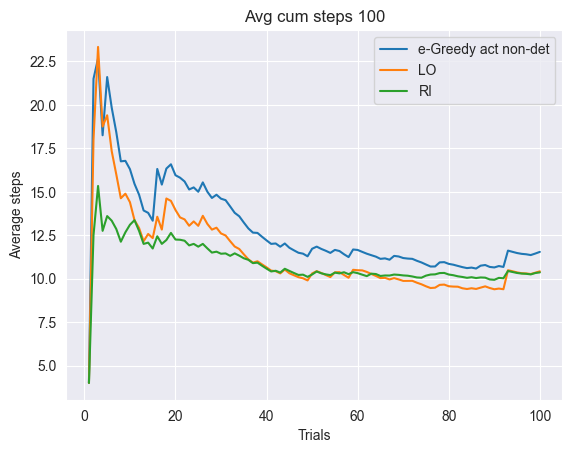

In [15]:
comp_data = {
    "e-Greedy act non-det": (steps_eg_step_non_env_100, "-"),
    "LO": (stepsLO_100, "-"),
    "RI": ([steps if steps != np.inf else 250 for steps in stepsRI_100], "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Avg cum steps 100")

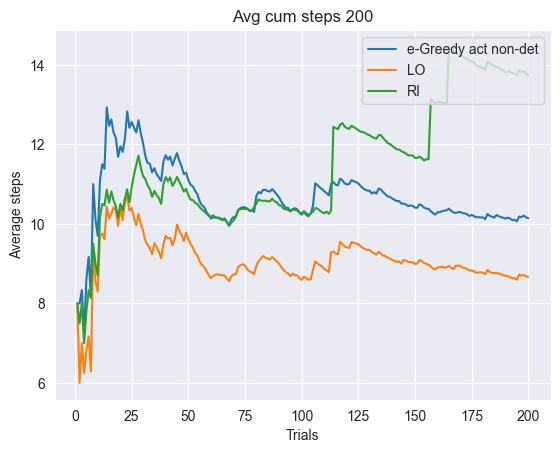

In [16]:
comp_data = {
    "e-Greedy act non-det": (steps_eg_step_non_env_200, "-"),
    "LO": (stepsLO_200, "-"),
    "RI": ([steps if steps != np.inf else 250 for steps in stepsRI_200], "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Avg cum steps 200")

In [17]:
from scipy.stats import iqr


def get_outliers(x, axis=0, bar=1.5):
    d_iqr = iqr(x, axis=axis)
    d_q3 = np.percentile(x, 95, axis=axis)
    iqr_distance = np.multiply(d_iqr, bar)

    stat_shape = list(x.shape)
    stat_shape[axis] = 1

    upper_range = d_q3 + iqr_distance
    upper_outlier = np.greater(x - upper_range.reshape(stat_shape), 0)

    return [False if res else True for res in upper_outlier]


def clear_arr(arr):
    return np.array(arr)[get_outliers(np.array(arr))]

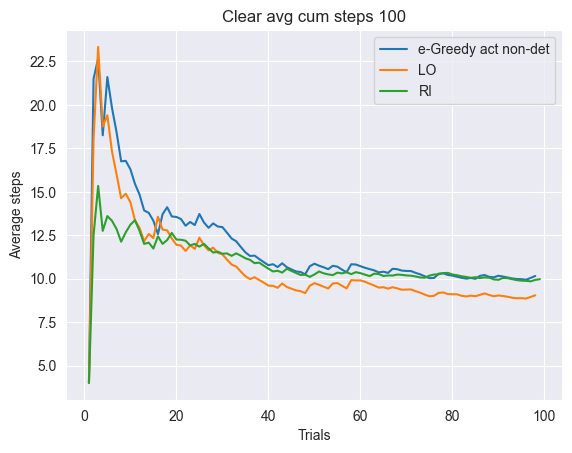

In [18]:
comp_data = {
    "e-Greedy act non-det": (clear_arr(steps_eg_step_non_env_100), "-"),
    "LO": (clear_arr(stepsLO_100), "-"),
    "RI": (clear_arr(stepsRI_100), "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Clear avg cum steps 100")

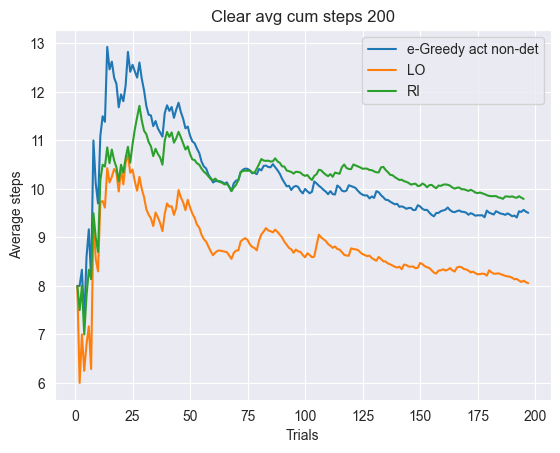

In [19]:
comp_data = {
    "e-Greedy act non-det": (clear_arr(steps_eg_step_non_env_200), "-"),
    "LO": (clear_arr(stepsLO_200), "-"),
    "RI": (clear_arr(stepsRI_200), "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Clear avg cum steps 200")

In [20]:
wh_100 = np.array(weights_history_100)
wh_200 = np.array(weights_history_200)

In [21]:
print(wh_100)

[[0.52040816 0.47959184]
 [0.52040816 0.47959184]
 [0.52       0.48      ]
 ...
 [0.49889402 0.50110598]
 [0.49892839 0.50107161]
 [0.49896266 0.50103734]]


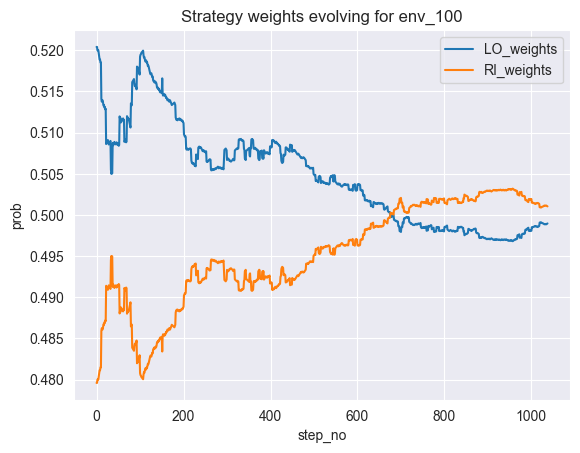

In [22]:
plt.plot(range(len(wh_100)), wh_100[:, 0], "-", label="LO_weights")
plt.plot(range(len(wh_100)), wh_100[:, 1], "-", label="RI_weights")

plt.xlabel("step_no")
plt.ylabel("prob")
plt.title("Strategy weights evolving for env_100")
plt.legend(loc="upper right")
plt.show()

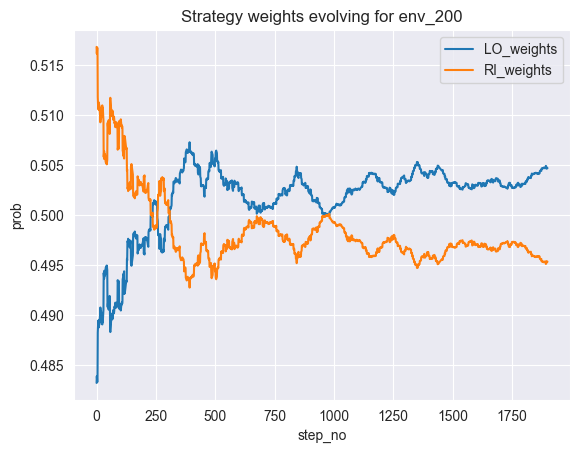

In [23]:
plt.plot(range(len(wh_200)), wh_200[:, 0], "-", label="LO_weights")
plt.plot(range(len(wh_200)), wh_200[:, 1], "-", label="RI_weights")

plt.xlabel("step_no")
plt.ylabel("prob")
plt.title("Strategy weights evolving for env_200")
plt.legend(loc="upper right")
plt.show()